In [1]:
from tika import parser
import re

In [2]:
def read_pdf(filePath,title):
    data = parser.from_file(filePath+'\\'+title)#text화
    content = data["content"].strip()#빈칸 제거
    
    try:
        content=content.split('regulations.\n\n광운대학교')[1]#1페이지 제거
    except:# 공용 1페이지가 존재하지 않는 경우
        pass
        
    content= re.sub('[^A-Za-z0-9가-힣(),.]', ' ',content)#필요한 부분만 남기기
    return content

In [3]:
import os
file_list = os.listdir('C:\\Users\\jessy\\Desktop\\산학연계\\pdf')
file_list

['[산학연 연구실 소개] 연세대학교 화공생명공학과 스마트 전자소자 및 공정 연구실 (Smart Electronic-Device & Process Lab. (SEPL), Yonsei University).pdf',
 '[연구실 · 기업체 탐방] 한국생명공학연구원 감염병연구센터.pdf',
 '生命과 醫療 그리고 刑事法的 爭點 - 생명의 시작과 마지막 단계를 중심으로 -.pdf',
 '국내 생명연구자원 관리 현황과 개선 방향.pdf',
 '상명대학교 생명공학과 미생물공학 연구실(Microbial Technology Lab).pdf',
 '생명공학 인공지능에 대한 기대와 고려사항.pdf',
 '생명공학정책의 진단과 발전방안 연구 사회적 수용 및 시민참여를 중심으로.pdf',
 '식품생명공학자의 융합연구 도전기.pdf']

In [4]:
import pandas as pd
import numpy as np

content = []
for i in file_list:
    content.append(read_pdf("C:\\Users\\jessy\\Desktop\\산학연계\\pdf", i))
        
pdf_list = pd.DataFrame({'title' : file_list,
                        'content' : content})
pdf_list

2022-02-18 11:22:56,126 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar to C:\Users\jessy\AppData\Local\Temp\tika-server.jar.
2022-02-18 11:23:02,673 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar.md5 to C:\Users\jessy\AppData\Local\Temp\tika-server.jar.md5.
2022-02-18 11:23:04,236 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...
2022-02-18 11:23:09,251 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


,title,content
0,[산학연 연구실 소개] 연세대학교 화공생명공학과 스마트 전자소자 및 공정 연구실 (...,223.194.41. 2022 01 04 20 32 (KST) http ...
1,[연구실 · 기업체 탐방] 한국생명공학연구원 감염병연구센터.pdf,223.194.41. 2022 01 04 20 33 (KST) http ...
2,生命과 醫療 그리고 刑事法的 爭點 - 생명의 시작과 마지막 단계를 중심으로 -.pdf,223.194.41. 2022 01 04 20 33 (KST) http ...
3,국내 생명연구자원 관리 현황과 개선 방향.pdf,223.194.41. 2022 01 04 20 32 (KST) http ...
4,상명대학교 생명공학과 미생물공학 연구실(Microbial Technology Lab...,223.194.41. 2022 01 04 20 33 (KST) http ...
5,생명공학 인공지능에 대한 기대와 고려사항.pdf,223.194.41. 2022 01 04 20 32 (KST) http ...
6,생명공학정책의 진단과 발전방안 연구 사회적 수용 및 시민참여를 중심으로.pdf,223.194.41. 2022 01 04 20 32 (KST) http ...
7,식품생명공학자의 융합연구 도전기.pdf,223.194.41. 2022 01 04 20 33 (KST) http ...


In [5]:
# 텍스트 단어들의 어근 원형을 추출하기 위해 함수 생성
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import nltk
import string
# string.puncutaion에 문자열의 모든 구두점이 들어있음
# 이를 활용해서 Tokenize시킬 때 구두점들을 제외하기 위한 것
# ord('문자열') => 문자열의 ASCII코드를 반환해줌!
# dict(key, value)형태로 모든 구두점의 각 ASCII코드를 key값으로 넣어주자!
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

# 토큰화한 각 단어들의 원형들을 리스트로 담아서 반환
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]
# 텍스트를 Input으로 넣어서 토큰화시키고 토큰화된 단어들의 원형들을 리스트로 담아 반환
def LemNormalize(text):
    # .translate인자에 구두점 dict넣어주어서 구두점 삭제해준 상태로 토큰화시키기!
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

# Tf-idf 벡터화시키면서 cusotmized해준 토큰화+어근추출 방식 tokenizer인자에 넣어주기
# 벡터화시킬 Tf-idf 도구 옵션 추가해서 구축
# 1,2gram적용, 빈도수 0.05이하, 0.85이상의 빈도수 단어들 제거
tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize,
                            stop_words='english', ngram_range=(1,2),
                            min_df=0.05, max_df=0.85)
# fit_transform으로 위에서 구축한 도구로 텍스트 벡터화
ftr_vect = tfidf_vect.fit_transform(pdf_list['content'])

C:\Users\jessy\Anaconda3\envs\jipark\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


In [6]:
# K-means로 3개 군집으로 문서 군집화시키기
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=10000, random_state=42)
# 비지도 학습이니 feature로만 학습시키고 예측
cluster_label = kmeans.fit_predict(ftr_vect)

# 군집화한 레이블값들을 document_df 에 추가하기
pdf_list['cluster_label'] = cluster_label
print(pdf_list.sort_values(by=['cluster_label']))

                                               title  \
1               [연구실 · 기업체 탐방] 한국생명공학연구원 감염병연구센터.pdf   
2    生命과 醫療 그리고 刑事法的 爭點 - 생명의 시작과 마지막 단계를 중심으로 -.pdf   
3                         국내 생명연구자원 관리 현황과 개선 방향.pdf   
5                         생명공학 인공지능에 대한 기대와 고려사항.pdf   
6        생명공학정책의 진단과 발전방안 연구 사회적 수용 및 시민참여를 중심으로.pdf   
7                              식품생명공학자의 융합연구 도전기.pdf   
0  [산학연 연구실 소개] 연세대학교 화공생명공학과 스마트 전자소자 및 공정 연구실 (...   
4  상명대학교 생명공학과 미생물공학 연구실(Microbial Technology Lab...   

                                             content  cluster_label  
1   223.194.41.    2022 01 04 20 33 (KST)  http  ...              0  
2   223.194.41.    2022 01 04 20 33 (KST)  http  ...              1  
3   223.194.41.    2022 01 04 20 32 (KST)  http  ...              1  
5   223.194.41.    2022 01 04 20 32 (KST)  http  ...              1  
6   223.194.41.    2022 01 04 20 32 (KST)  http  ...              1  
7   223.194.41.    2022 01 04 20 33 (KST)  http  ...              1  
0   2

In [7]:
# 문서의 feature(단어별) cluster_centers_확인해보자
cluster_centers = kmeans.cluster_centers_
print(cluster_centers.shape)
print(cluster_centers)
# shape의 행은 클러스터 레이블, 열은 벡터화 시킨 feature(단어들)

(3, 30114)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.00134135 0.         0.        ]
 [0.0066724  0.0066724  0.0066724  ... 0.         0.01309908 0.01309908]]


In [8]:
def get_cluster_details(cluster_model, cluster_data, feature_names,
                       cluster_num, top_n_features=10):
    cluster_details = {}
    # 각 클러스터 레이블별 feature들의 center값들 내림차순으로 정렬 후의 인덱스를 반환
    center_feature_idx = cluster_model.cluster_centers_.argsort()[:,::-1]
    
    # 개별 클러스터 레이블별로 
    for cluster_num in range(cluster_num):
        # 개별 클러스터별 정보를 담을 empty dict할당
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        # 각 feature별 center값들 정렬한 인덱스 중 상위 10개만 추출
        top_ftr_idx = center_feature_idx[cluster_num, :top_n_features]
        top_ftr = [feature_names[idx] for idx in top_ftr_idx]
        # top_ftr_idx를 활용해서 상위 10개 feature들의 center값들 반환
        # 반환하게 되면 array이기 떄문에 리스트로바꾸기
        top_ftr_val = cluster_model.cluster_centers_[cluster_num, top_ftr_idx].tolist()
        
        # cluster_details 딕셔너리에다가 개별 군집 정보 넣어주기
        cluster_details[cluster_num]['top_features'] = top_ftr
        cluster_details[cluster_num]['top_featrues_value'] = top_ftr_val
        # 해당 cluster_num으로 분류된 파일명(문서들) 넣어주기
        filenames = cluster_data[cluster_data['cluster_label']==cluster_num]['title']
        # filenames가 df으로 반환되기 떄문에 값들만 출력해서 array->list로 변환
        filenames = filenames.values.tolist()
        cluster_details[cluster_num]['filenames'] = filenames
    
    return cluster_details

def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print(f"#####Cluster Num: {cluster_num}")
        print()
        print("상위 10개 feature단어들:\n", cluster_detail['top_features'])
        print()
        print(f"Cluster {cluster_num}으로 분류된 문서들:\n{cluster_detail['filenames'][:5]}")
        print('-'*20)

feature_names = tfidf_vect.get_feature_names()
cluster_details = get_cluster_details(cluster_model=kmeans,
                                     cluster_data=pdf_list,
                                     feature_names=feature_names,
                                     cluster_num=3,
                                     top_n_features=10)
print_cluster_details(cluster_details)

#####Cluster Num: 0

상위 10개 feature단어들:
 ['vois00633003 http', '33kst 광운대학교', 'publicationid plct00008126', 'plct00008126 http', 'plct00008126', 'vois00633003', 'voisid vois00633003', '33kst', '20 33kst', '한국생명공학연구원 감염병연구센터']

Cluster 0으로 분류된 문서들:
['[연구실 · 기업체 탐방] 한국생명공학연구원 감염병연구센터.pdf']
--------------------
#####Cluster Num: 1

상위 10개 feature단어들:
 ['있다', '생명연구자원', '생명공학', '한다', '관리', '생명연구자원의', '국내', '위한', '사회적', '머신러닝']

Cluster 1으로 분류된 문서들:
['生命과 醫療 그리고 刑事法的 爭點 - 생명의 시작과 마지막 단계를 중심으로 -.pdf', '국내 생명연구자원 관리 현황과 개선 방향.pdf', '생명공학 인공지능에 대한 기대와 고려사항.pdf', '생명공학정책의 진단과 발전방안 연구 사회적 수용 및 시민참여를 중심으로.pdf', '식품생명공학자의 융합연구 도전기.pdf']
--------------------
#####Cluster Num: 2

상위 10개 feature단어들:
 ['있습니다', '뉴로모픽', '연구실', '미생물공학', '소자', '연구실은', '전자소자', '다양한', '소자를', '2차원']

Cluster 2으로 분류된 문서들:
['[산학연 연구실 소개] 연세대학교 화공생명공학과 스마트 전자소자 및 공정 연구실 (Smart Electronic-Device & Process Lab. (SEPL), Yonsei University).pdf', '상명대학교 생명공학과 미생물공학 연구실(Microbial Technology Lab).pdf']
--------------------


C:\Users\jessy\Anaconda3\envs\jipark\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [9]:
# 클러스터링된 문서들 중에서 특정 문서를 하나 선택한 후 비슷한 문서 추출
from sklearn.metrics.pairwise import cosine_similarity

hotel_idx = pdf_list[pdf_list['cluster_label']==1].index
print("두번째 카테고리로 클러스터링된 문서들의 인덱스:\n",hotel_idx)
print()
# 호텔 카테고리로 클러스터링 된 문서들의 인덱스 중 하나 선택해 비교 기준으로 삼을 문서 선정
comparison_doc = pdf_list.iloc[hotel_idx[0]]['title']
print("##유사도 비교 기준 문서 이름:",comparison_doc,'##')
print()

# 위에서 추출한 호텔 카테고리로 클러스터링된 문서들의 인덱스 중 0번인덱스(비교기준문서)제외한
# 다른 문서들과의 유사도 측정
similarity = cosine_similarity(ftr_vect[hotel_idx[0]], ftr_vect[hotel_idx])
print(similarity)

두번째 카테고리로 클러스터링된 문서들의 인덱스:
 Int64Index([2, 3, 5, 6, 7], dtype='int64')

##유사도 비교 기준 문서 이름: 生命과 醫療 그리고 刑事法的 爭點 - 생명의 시작과 마지막 단계를 중심으로 -.pdf ##

[[1.         0.05176766 0.0515582  0.09191346 0.04336746]]


Int64Index([6, 3, 5, 7], dtype='int64')
[0.09191346 0.05176766 0.0515582  0.04336746]

길이 비교 4 4



Text(0.5, 1.0, '生命과 醫療 그리고 刑事法的 爭點 - 생명의 시작과 마지막 단계를 중심으로 -.pdf')

C:\Users\jessy\Anaconda3\envs\jipark\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 29983 (\N{CJK UNIFIED IDEOGRAPH-751F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jessy\Anaconda3\envs\jipark\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21629 (\N{CJK UNIFIED IDEOGRAPH-547D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jessy\Anaconda3\envs\jipark\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jessy\Anaconda3\envs\jipark\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 37291 (\N{CJK UNIFIED IDEOGRAPH-91AB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jessy\Anaconda3\envs\jipark\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30274 (\N{CJK UNIFIED IDEOGRAPH-7642}) missin

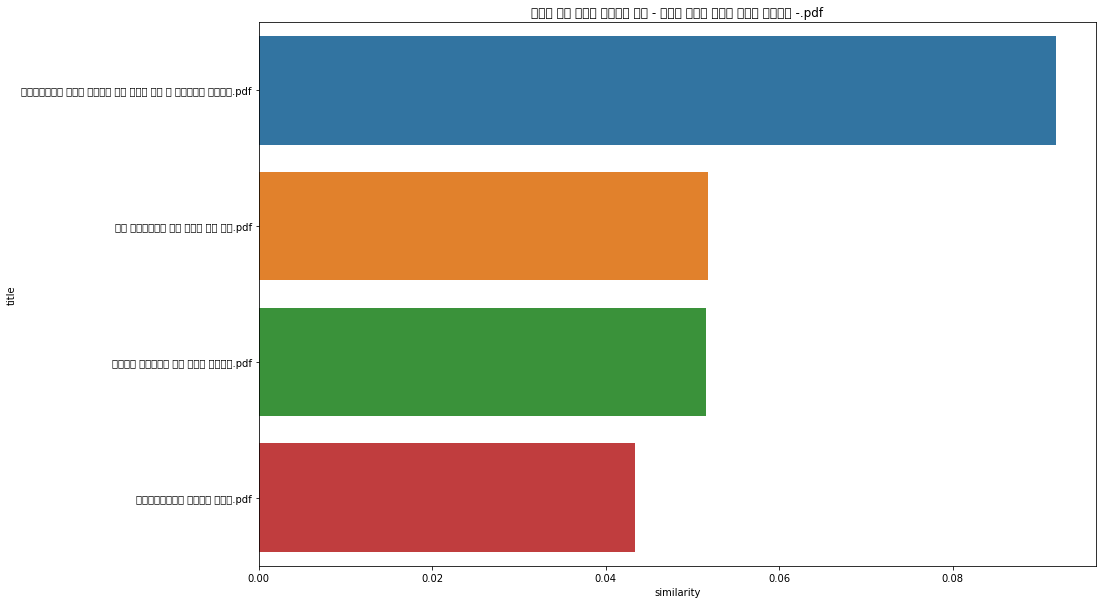

In [12]:
# 비교기준 문서와 다른 문서들간의 유사도 살펴보기
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# array 내림차순으로 정렬한 후 인덱스 반환 [:,::-1] 모든행에 대해서 열을 내림차순으로!
sorted_idx = similarity.argsort()[:,::-1]
# 비교문서 당사자는 제외한 인덱스 추출
sorted_idx = sorted_idx[:, 1:]

# 유사도가 큰 순으로 hotel_idx(label=1인 즉, 호텔과관련된 내용의 문서이름들의 index들)에서 재 정렬 
# index로 넣으려면 1차원으로 reshape해주기!
hotel_sorted_idx = hotel_idx[sorted_idx.reshape(-1,)]
# 유사도 행렬값들을 유사도가 큰 순으로 재정렬(비교 문서 당사자는 제외)
hotel_sim_values = np.sort(similarity.reshape(-1,))[::-1]
hotel_sim_values = hotel_sim_values[1:]
# 이렇게 되면 비교문서와 가장 유사한 순으로 '해당문서의index-유사도값' 으로 동일한 위치가 매핑된 두 개의 array!
# 그래서 그대로 데이터프레임의 각 칼럼으로 넣어주기
print(hotel_sorted_idx)
print(hotel_sim_values)
print()
print("길이 비교", len(hotel_sorted_idx), len(hotel_sim_values))
print()
# 빈 데이터프레임 생성
hotel_sim_df = pd.DataFrame()
# hotel_sorted_idx 와 hotel_sim_values 매핑시킨 array임
hotel_sim_df['title'] = pdf_list.iloc[hotel_sorted_idx]['title']
hotel_sim_df['similarity'] = hotel_sim_values

plt.figure(figsize=(15,10))
sns.barplot(data=hotel_sim_df, x='similarity', y='title')
plt.title(comparison_doc)